**🐶 End-to-end Multi-class Dog Breed Classification**

This notebook builds an end-to-end multi-class image classifier using TensorFlow 2.x and TensorFlow Hub.

The data we're using is from Kaggle's dog breed identification competition.

  > https://www.kaggle.com/c/dog-breed-identification/data

Evaluation is a file with prediction probabilities for each dog breed of each test image.

  > https://www.kaggle.com/c/dog-breed-identification/overview/evaluation

Some information about the data:
  * We're dealing with images (unstructured data) so it's probably best we use deep learning/transfer learning.
  * There are 120 breeds of dogs (this means there are 120 different classes).
  * There are around 10,000+ images in the training set (these images have labels).
  * There are around 10,000+ images in the test set (these images have no labels, because we'll want to predict them).

In [ ]:
# unziping test and train datasets
# !unzip "/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/test.zip" -d "/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data"
# !unzip "/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/train.zip" -d "/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data"

Import TensorFlow 2.x & TensorFlow Hub

In [ ]:
import tensorflow as tf
print("Tensorflow version: ", tf.__version__)
import tensorflow_hub as hub
print("Hub version: ", hub.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Tensorflow version:  2.12.0
Hub version:  0.13.0
Num GPUs Available:  1


labels.csv contains all of the image IDs and assosciated dog breed (data and labels).

In [ ]:
import pandas as pd
labels_csv = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/labels.csv')
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [ ]:
labels_csv['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
brabancon_griffon        67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

<Axes: >

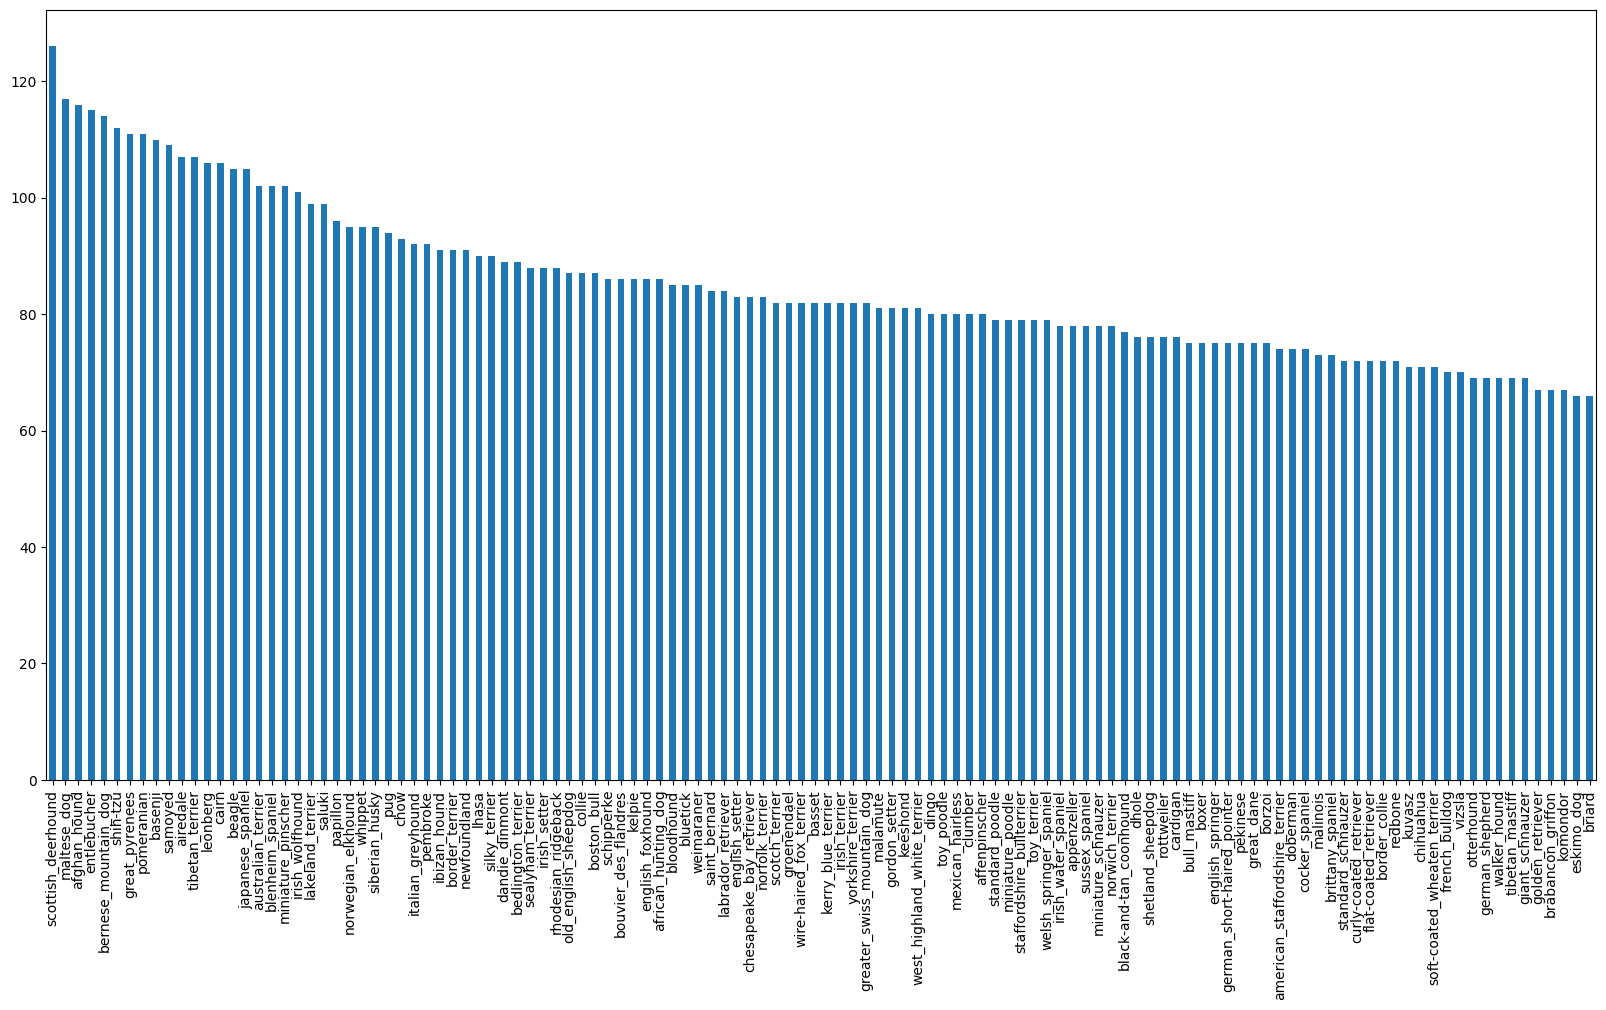

In [ ]:
labels_csv['breed'].value_counts().plot.bar(figsize=(20,10))

In [ ]:
labels_csv['breed'].value_counts().sum()

10222

In [ ]:
labels_csv['breed'].value_counts().median()

82.0

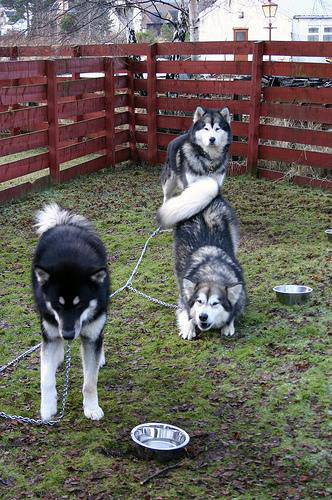

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/test/0110fb82ad93572bd6f5dae4b048037d.jpg')

Getting images and their labels
Use labels_csv to create:
  >A list a filepaths to training images.

  >An array of all labels.
  
  >An array of all unique labels.

In [ ]:
# Create pathnames from image ID's
filenames = ["/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/train/" + fname + ".jpg" for fname in  labels_csv['id']]
filenames[:10]

['/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/t

In [ ]:
import os
if len(os.listdir("/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/train")) == len(filenames):
  print("No of files in label match training data")
else:
  print("No of files in label do not match training data")
len(os.listdir("/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/train"))

No of files in label match training data


10222

In [ ]:
# Preparing our labels
import numpy as np
labels = labels_csv['breed'].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [ ]:
len(labels)

10222

In [ ]:
# Check no of labels match no of filenames
if len(labels) == len(filenames):
  print("No of files in label match filenames")
else:
  print("No of files in label do not match filenames")

No of files in label match filenames


In [ ]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [ ]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

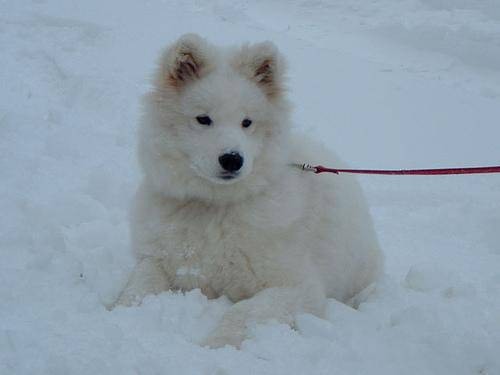

In [ ]:
Image(filenames[70])

In [ ]:
labels[70]

'samoyed'

In [ ]:
if len(labels) == len(filenames):
  print('matching length')
else:
  print('length does not match')

matching length


In [ ]:
# Turn single label into boolean array
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [ ]:
# Turn every label into boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [ ]:
len(boolean_labels)

10222

In [ ]:
# Turning boolean array into integers
print(labels[0]) # original
print(np.where(unique_breeds == labels[0])) #  index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # one where the sample occurs

boston_bull
(array([19]),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [ ]:
print(labels[7])
print(boolean_labels[7].astype(int))

borzoi
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


Creating valiation set

In [ ]:
# Creating valiation set
X = filenames
y = boolean_labels

In [ ]:
# Start with 1000 images for experimentation
NUM_IMAGES = 1000 #@param{type:'slider',min:1000,max:10000,step:1000}

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2)

In [ ]:
len(X_train),len(y_train),len(X_val),len(y_val)

(800, 800, 200, 200)

In [ ]:
X_train[:2],y_val[:2]

(['/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/train/1066d43c5f952120ec355bb56459228a.jpg',
  '/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/train/135587061f51e7dabb820bbbd619977a.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, F

In [ ]:
# Importing images
from matplotlib.pyplot import imread
image = imread(filenames[37])
image.shape
tf.constant(image)

<tf.Tensor: shape=(332, 500, 3), dtype=uint8, numpy=
array([[[ 15,  38,  52],
        [ 12,  31,  45],
        [ 14,  28,  41],
        ...,
        [ 71,  42,  44],
        [ 70,  41,  43],
        [ 69,  40,  42]],

       [[ 11,  34,  48],
        [ 10,  29,  43],
        [ 14,  30,  43],
        ...,
        [ 71,  42,  44],
        [ 70,  41,  43],
        [ 69,  40,  42]],

       [[  5,  31,  46],
        [  8,  30,  44],
        [ 16,  32,  45],
        ...,
        [ 71,  43,  42],
        [ 70,  42,  41],
        [ 69,  41,  40]],

       ...,

       [[171, 119,  97],
        [172, 120,  98],
        [173, 121,  99],
        ...,
        [183, 102,  37],
        [182, 101,  36],
        [181, 100,  35]],

       [[170, 118,  96],
        [170, 118,  96],
        [171, 119,  97],
        ...,
        [180,  99,  36],
        [179,  98,  35],
        [178,  97,  34]],

       [[169, 117,  95],
        [169, 117,  95],
        [170, 118,  96],
        ...,
        [179,  98,  3

Preprocessing images (turning images into Tensors)

In [ ]:
# Functions for preprocessing images
IMG_SIZE = 224

def process_img(image_path):

  image = tf.io.read_file(image_path) # read image
  image = tf.image.decode_jpeg(image,channels=3) # jpeg to numerical tensor with 3 color channels
  image = tf.image.convert_image_dtype(image,np.float32) # normalize(0 - 255 to 0 - 1)
  image =  tf.image.resize(image,size=[IMG_SIZE,IMG_SIZE]) # resize img to desired value of 244 x 244

  return image

In [ ]:
# Function to return tuple (image,label)

def get_image_label(image_path,label):
  image =  process_img(image_path)
  return image, label

## Turning data into batches

In [ ]:
# (10000+ images may not fit in the memory)

BATCH_SIZE = 32

def create_batches(X,y=None,batch_size = BATCH_SIZE,valid_data=False,test_data=False):
  """
  Creates batches of data image (X) and labels (y) pairs
  Shuffles data only if its training data
  Accepts test data as input (no labels)
  """
  # for test data set (no labels)
  if test_data:
    print('Test batches in progress...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # Filepaths only (no labels)
    data_batch = data.map(process_img).batch(BATCH_SIZE)
    return data_batch
  # For Validation batch
  elif valid_data:
    print('Validation batches in progress...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y))) # Filepaths and labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch
  # For training data
  else:
    print('Training batches in progress...')
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),tf.constant(y))) # Filepaths and labels
    data = data.shuffle(buffer_size=len(X)) # Shuffling image pathnames ()
    data_batch = data.map(get_image_label).batch(BATCH_SIZE) # Shuffing after this step will take longer as we whole images will be moved
    return data_batch

In [ ]:
train_data = create_batches(X_train,y_train)
val_data = create_batches(X_val,y_val,valid_data=True)

Training batches in progress...
Validation batches in progress...


In [ ]:
train_data.element_spec,val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [ ]:
# Visualizing data batches
import matplotlib.pyplot as plt

def show_images(images,labels):

  plt.figure(figsize=(13,10))
  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis('off')


In [ ]:
train_images , train_labels = next(train_data.as_numpy_iterator())
len(train_images) , len(train_labels)

(32, 32)

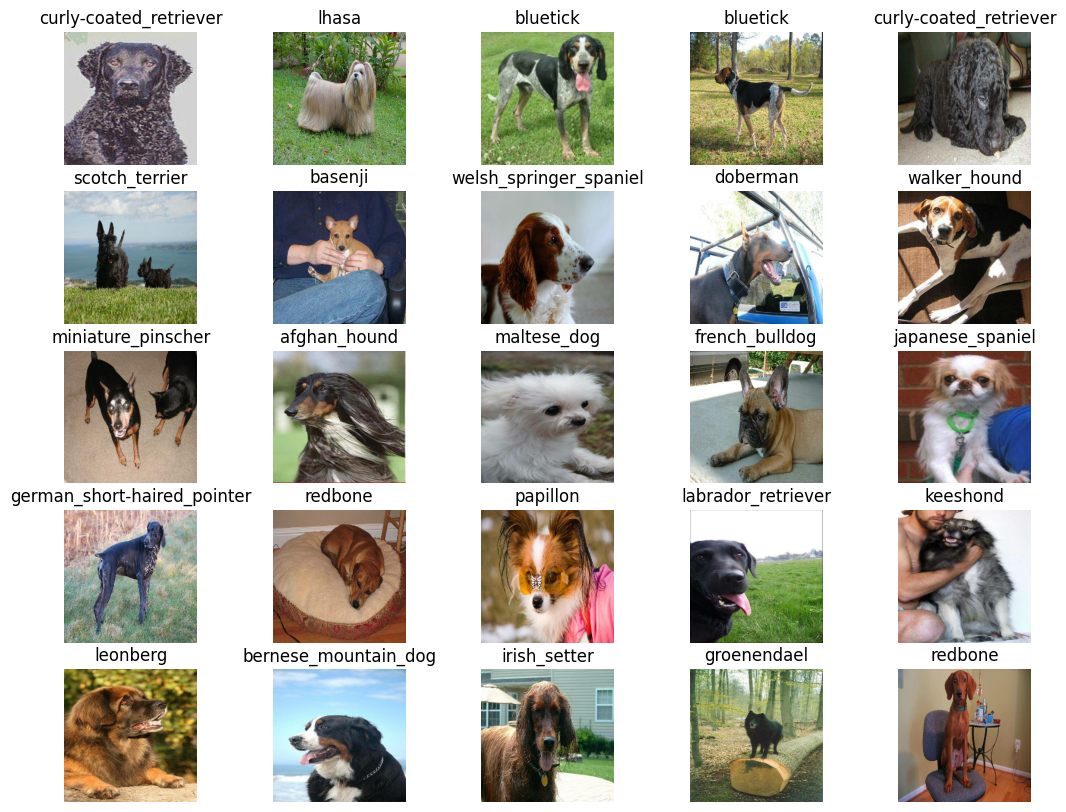

In [ ]:
show_images(train_images, train_labels)

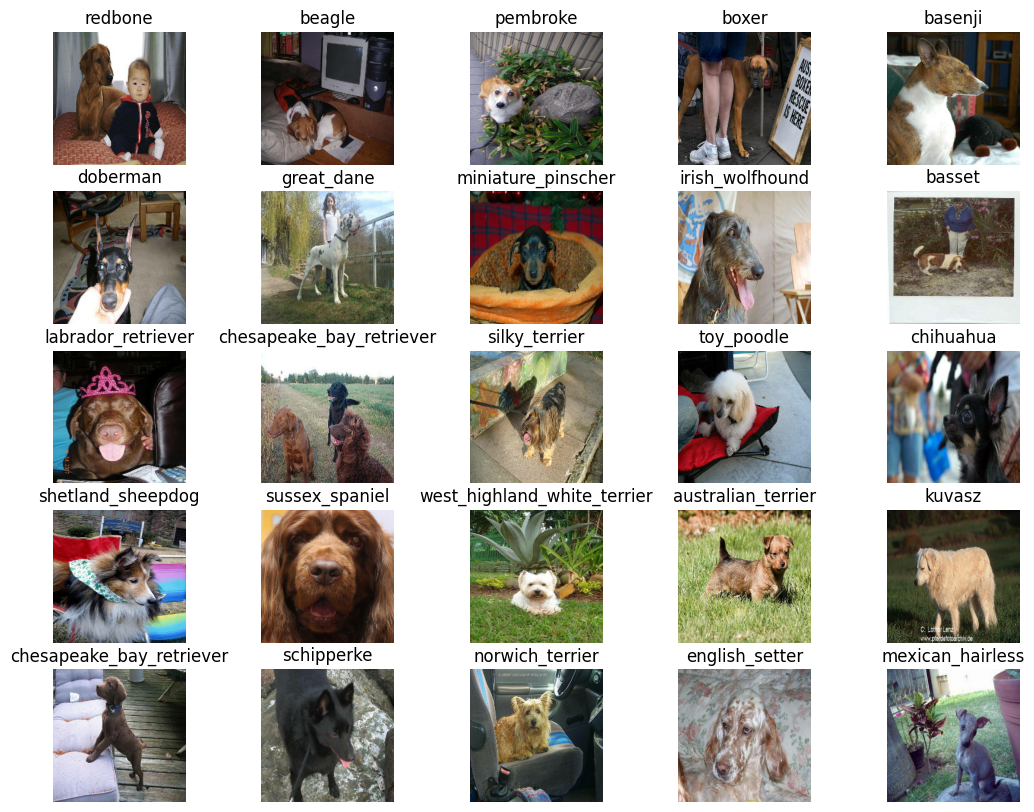

In [ ]:
val_images , val_labels = next(val_data.as_numpy_iterator())
len(val_images) , len(val_labels)
show_images(val_images , val_labels)

## Building a model

In [ ]:
INPUT_SHAPE = [None ,IMG_SIZE,IMG_SIZE,3]
OUTPUT_SHAPE = len(unique_breeds)
MODEL_URL = 'https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5' # From tensorflow hub pickup model

In [ ]:
# Inputs outputs and model are ready to go, now to put them into keras deep learning model.
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print('Building model with:',MODEL_URL)

  model = tf.keras.Sequential([
    hub.KerasLayer(MODEL_URL),
    tf.keras.layers.Dense(units=OUTPUT_SHAPE, activation='softmax')
  ])
  model.compile(
      loss=tf.keras.losses.CategoricalCrossentropy(),
      optimizer=tf.keras.optimizers.Adam(),
      metrics=['accuracy']
  )
  model.build(INPUT_SHAPE)
  return model

In [ ]:
model = create_model()
model.summary()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [ ]:
from keras.api._v2.keras.callbacks import TensorBoard
# Creating callbacks (helper functions to save,check or stop progress of an model)

# Tensorboard callback function

import datetime

def tensorboard_callback():
  logdir = os.path.join('/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/logs',
                        datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  return tf.keras.callbacks.TensorBoard(logdir)


In [ ]:
# early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)

# Training the model

In [ ]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, step:10}


In [ ]:
# Build function to train and return a trained model

def train_model():
  model = create_model()

  tensorboard = tensorboard_callback()

  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=val_data,
            validation_freq=1,
            callbacks = [tensorboard,early_stopping]
            )
  return model

In [ ]:
model = train_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Epoch 1/100
25/25 [==============================] - 156s 6s/step - loss: 4.5659 - accuracy: 0.0988 - val_loss: 3.3309 - val_accuracy: 0.3000
Epoch 2/100
25/25 [==============================] - 3s 128ms/step - loss: 1.6373 - accuracy: 0.6900 - val_loss: 2.1082 - val_accuracy: 0.4550
Epoch 3/100
25/25 [==============================] - 4s 148ms/step - loss: 0.5592 - accuracy: 0.9438 - val_loss: 1.6789 - val_accuracy: 0.5850
Epoch 4/100
25/25 [==============================] - 4s 145ms/step - loss: 0.2477 - accuracy: 0.9900 - val_loss: 1.5253 - val_accuracy: 0.6300
Epoch 5/100
25/25 [==============================] - 3s 126ms/step - loss: 0.1408 - accuracy: 0.9987 - val_loss: 1.4429 - val_accuracy: 0.6100
Epoch 6/100
25/25 [==============================] - 3s 125ms/step - loss: 0.0965 - accuracy: 1.0000 - val_loss: 1.3943 - val_accuracy: 0.6350
Epoch 7/100
25/25 [==============================]

In [ ]:
# %tensorboard --logdir  drive/MyDrive/Cloab\ Notebooks/Dog-breed-identification/data/logs

In [ ]:
predictions = model.predict(val_data,verbose=1)
predictions

7/7 [==============================] - 1s 83ms/step


array([[3.8258464e-03, 5.3148214e-02, 4.4956334e-05, ..., 2.7422565e-03,
        1.3715506e-03, 4.3341340e-03],
       [1.1616722e-03, 5.4483199e-03, 2.0918075e-04, ..., 4.7275209e-04,
        1.5046375e-02, 5.4450316e-04],
       [8.0620096e-04, 2.0906473e-04, 6.5559702e-04, ..., 2.3744670e-03,
        7.8770444e-03, 7.3168601e-04],
       ...,
       [2.9804843e-04, 1.9812751e-04, 3.4986794e-04, ..., 2.1559540e-04,
        5.4781191e-04, 1.8391482e-04],
       [3.1456274e-03, 7.9977268e-04, 4.9751261e-03, ..., 4.4726438e-04,
        3.8641614e-05, 7.3743048e-03],
       [1.6305742e-03, 4.7983069e-04, 5.1918201e-04, ..., 4.0371282e-04,
        8.9404773e-04, 1.0624606e-03]], dtype=float32)

In [ ]:
predictions.shape

(200, 120)

In [ ]:
# Pred label based on prediction probabilities
def get_pred_label(prediction_probabilities):
  return unique_breeds[np.argmax(prediction_probabilities)]

In [ ]:
pred_label = get_pred_label(predictions[0])
pred_label

'miniature_poodle'

In [ ]:
# Function to unbatch dataset
def unbatch(data):
  images_ = []
  labels_ = []

  for image,label in data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(unique_breeds[np.argmax(label)])

  return images_,labels_

In [ ]:
val_images ,val_labels = unbatch(val_data)
val_images[0] ,val_labels[0]

(array([[[0.05193453, 0.1764706 , 0.11764707],
         [0.05193453, 0.1764706 , 0.11764707],
         [0.05193453, 0.1764706 , 0.11764707],
         ...,
         [0.0703498 , 0.21544784, 0.1448596 ],
         [0.08386256, 0.20890233, 0.15007879],
         [0.08696736, 0.20890233, 0.15007879]],
 
        [[0.0978379 , 0.20795695, 0.14913341],
         [0.0978379 , 0.20795695, 0.14913341],
         [0.0978379 , 0.20795695, 0.14913341],
         ...,
         [0.07058824, 0.21568629, 0.14509805],
         [0.07450981, 0.2057248 , 0.14403887],
         [0.07692572, 0.2039614 , 0.14403887]],
 
        [[0.2731793 , 0.35435927, 0.30507705],
         [0.2731793 , 0.35435927, 0.30507705],
         [0.2731793 , 0.35435927, 0.30507705],
         ...,
         [0.06581758, 0.21091564, 0.1403274 ],
         [0.0544492 , 0.19980502, 0.13300946],
         [0.05803773, 0.19810931, 0.13300946]],
 
        ...,
 
        [[0.33909118, 0.40098733, 0.16104889],
         [0.33320448, 0.39510062, 0.15451

In [ ]:
get_pred_label(val_labels[0])

'affenpinscher'

In [ ]:
get_pred_label(predictions[0])

'miniature_poodle'

In [ ]:
# prediction and ground truth for the image sample

def plot_pred(prediction_probabilities,labels,images,n=0):
  pred_prob,true_label,image = prediction_probabilities[n],labels[n],images[n]

  pred_label = get_pred_label(pred_prob)

  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  if pred_label == true_label:
    color='green'
  else:
    color='red'

  plt.title(f'Pred: {pred_label} {np.max(pred_prob)*100:2.0f}% True: {true_label}',color=color)



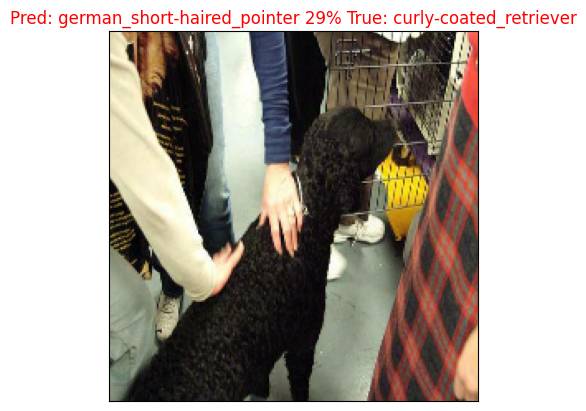

In [ ]:
plot_pred(prediction_probabilities = predictions,labels=val_labels,images=val_images,n=7)

In [ ]:
def plot_pred_conf(prediction_probabilities,labels,n=1):
  pred_prob, true_label = prediction_probabilities[n],labels[n]
  pred_label = get_pred_label(pred_prob)
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),top_10_pred_values,color='grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),labels=top_10_pred_labels,rotation='vertical')
  if np.isin(true_label,top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color('green')
  else:
    pass

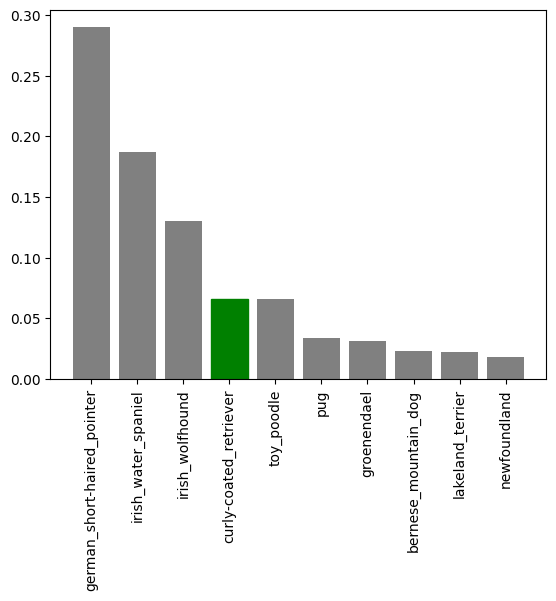

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,labels=val_labels,n=7)

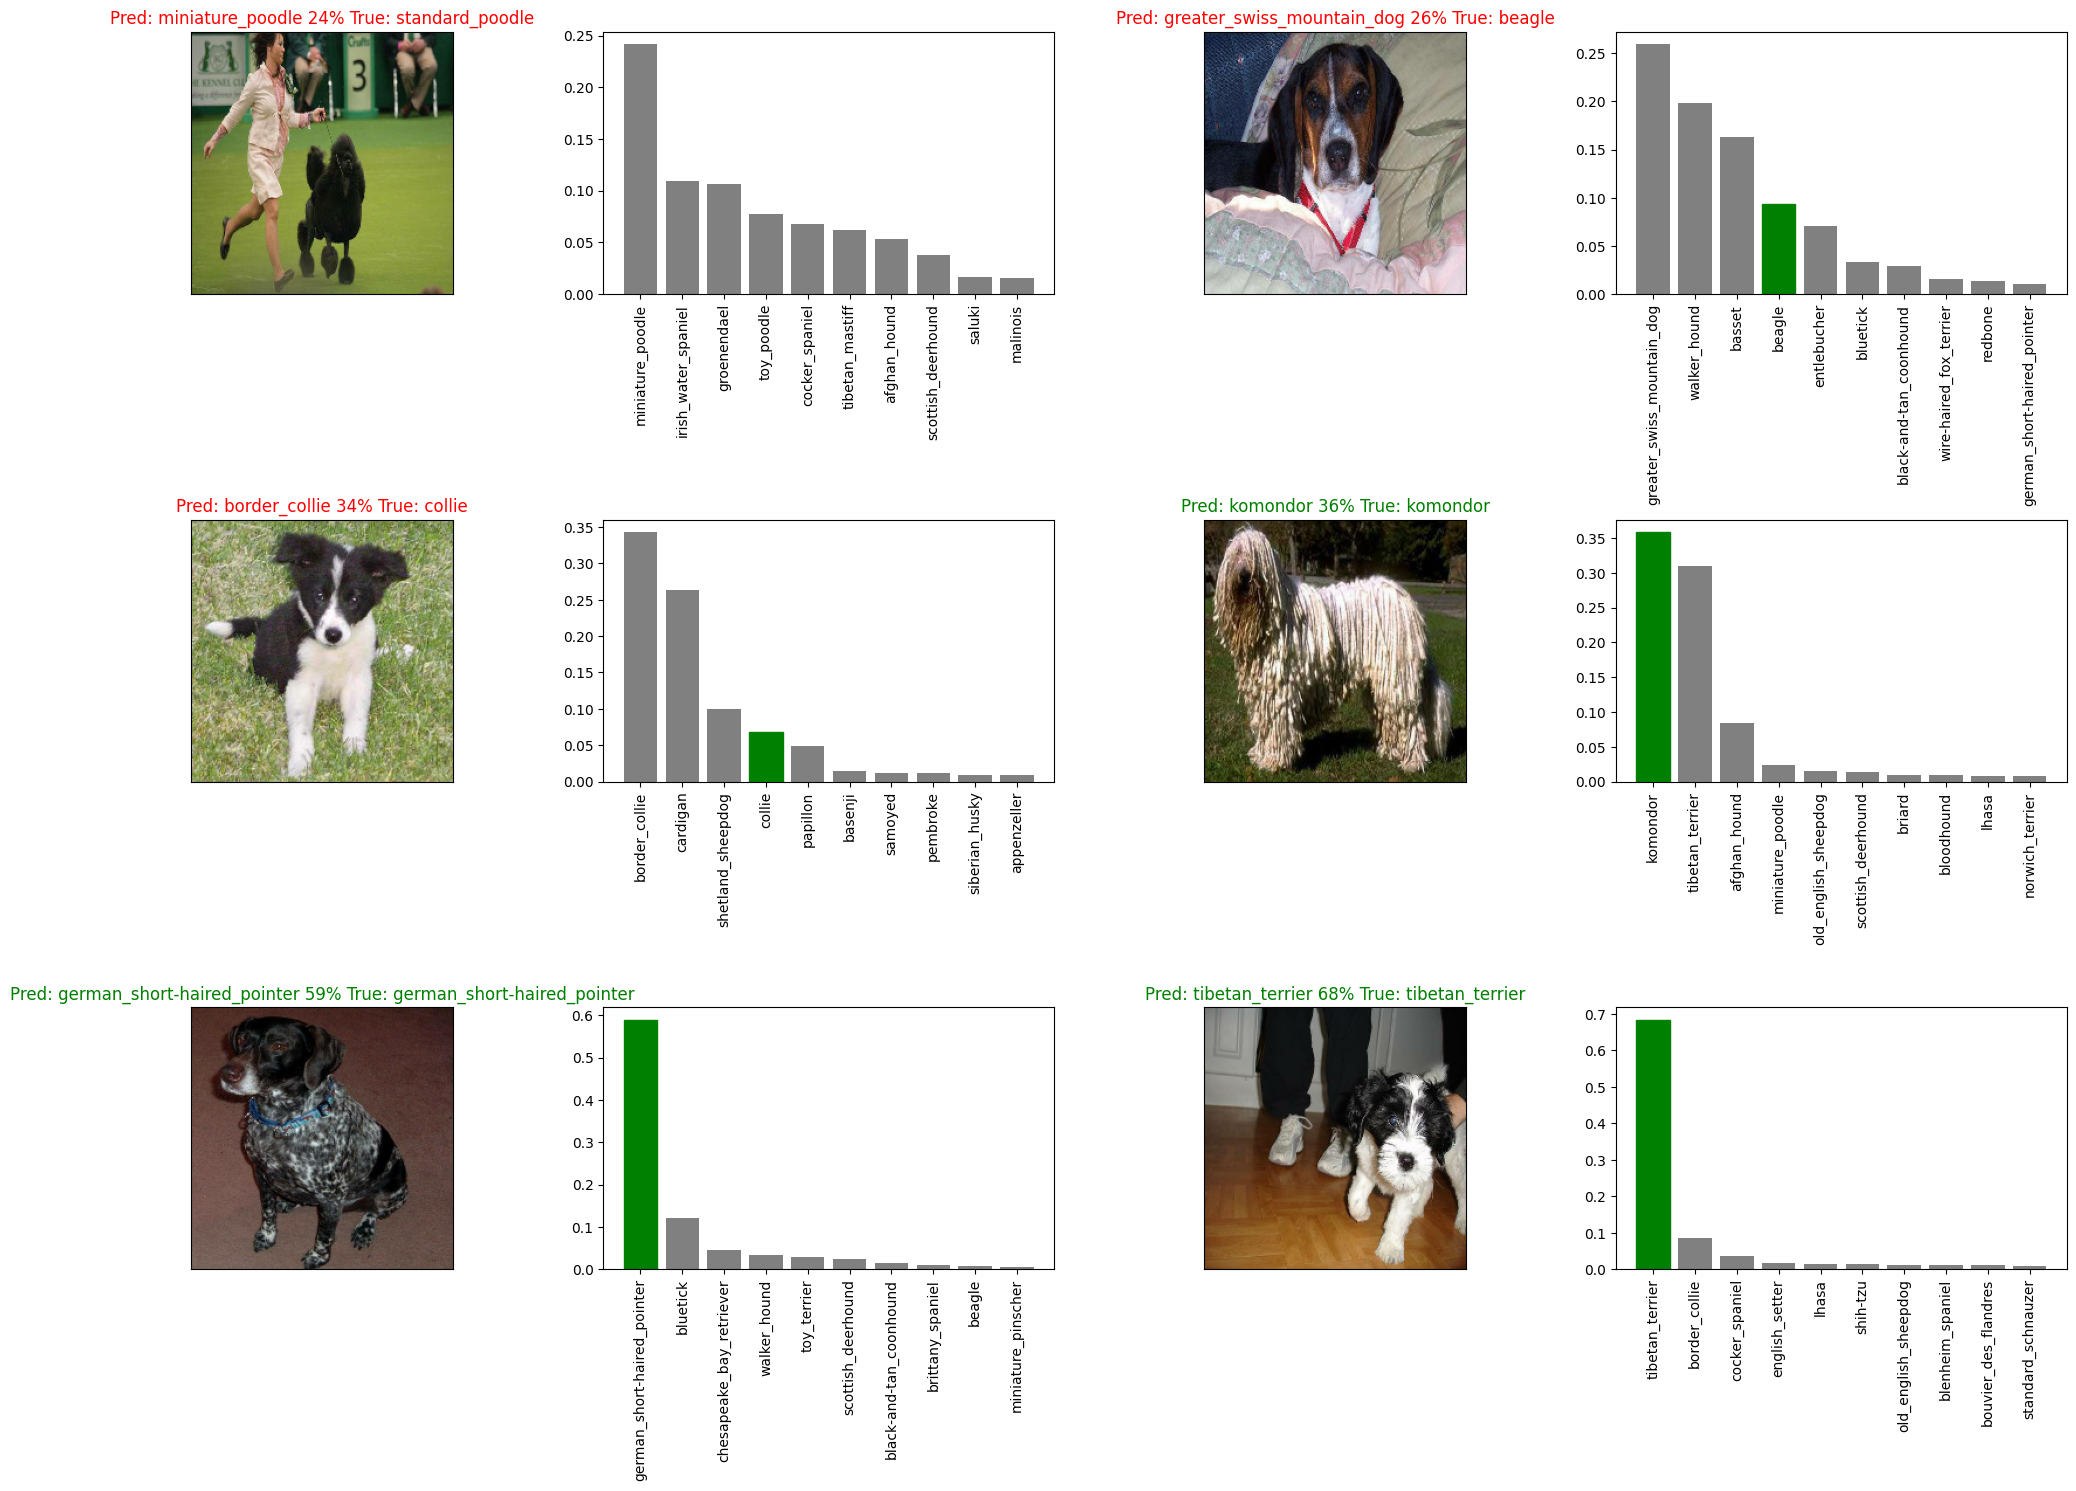

In [ ]:
# Checking a few predictions and their different values
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)

  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)

plt.tight_layout(h_pad=1.0)
plt.show()

## Save and Load the model

In [ ]:
# Function to save model
def save_model(model, suffix=None):

  # Create model directory with current time
  modeldir = os.path.join("/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/models",
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  model_path = modeldir + "-" + suffix + ".h5" # save format of model
  print(f"Saving model to: {model_path}...")
  model.save(model_path)
  return model_path

In [ ]:
# Function to load model
def load_model(model_path):

  print(f"Loading saved model from: {model_path}")
  model = tf.keras.models.load_model(model_path,
                                     custom_objects={"KerasLayer":hub.KerasLayer})
  return model

In [ ]:
# Save model trained on 1000 images
save_model(model, suffix="1000-images-Adam")

Saving model to: /content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/models/20230712-09341689154451-1000-images-Adam.h5...


'/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/models/20230712-09341689154451-1000-images-Adam.h5'

In [ ]:
# Evaluate the pre-saved model
model.evaluate(val_data)

7/7 [==============================] - 1s 122ms/step - loss: 1.3314 - accuracy: 0.6250


[1.3314049243927002, 0.625]

In [ ]:
# Load our model trained on 1000 images
model_1000_images = load_model('/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/models/20230712-09341689154451-1000-images-Adam.h5')

Loading saved model from: /content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/models/20230712-09341689154451-1000-images-Adam.h5


In [ ]:
# Evaluate the loaded model
model_1000_images.evaluate(val_data)

7/7 [==============================] - 1s 85ms/step - loss: 1.3314 - accuracy: 0.6250


[1.3314049243927002, 0.625]

## Training the model on complete data in a data batch

In [ ]:
len(X), len(y)

(10222, 10222)

In [ ]:
# Turn full training data in a data batch
full_data = create_batches(X, y)

Training batches in progress...


In [ ]:
# Instantiate a new model for training on the full dataset
full_model = create_model()

Building model with: https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5


In [ ]:
# Callbacks for the model
full_model_tensorboard = tensorboard_callback()
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=3)

In [ ]:
# Fitting the model to the data
full_model.fit(x=full_data,epochs=NUM_EPOCHS,callbacks=[full_model_tensorboard,full_model_early_stopping])

Epoch 1/100
320/320 [==============================] - 42s 118ms/step - loss: 1.3503 - accuracy: 0.6729
Epoch 2/100
320/320 [==============================] - 39s 121ms/step - loss: 0.4057 - accuracy: 0.8791
Epoch 3/100
320/320 [==============================] - 36s 112ms/step - loss: 0.2401 - accuracy: 0.9352
Epoch 4/100
320/320 [==============================] - 39s 121ms/step - loss: 0.1521 - accuracy: 0.9637
Epoch 5/100
320/320 [==============================] - 48s 150ms/step - loss: 0.1053 - accuracy: 0.9791
Epoch 6/100
320/320 [==============================] - 37s 114ms/step - loss: 0.0751 - accuracy: 0.9883
Epoch 7/100
320/320 [==============================] - 35s 110ms/step - loss: 0.0596 - accuracy: 0.9918
Epoch 8/100
320/320 [==============================] - 43s 133ms/step - loss: 0.0463 - accuracy: 0.9940
Epoch 9/100
320/320 [==============================] - 39s 122ms/step - loss: 0.0364 - accuracy: 0.9965
Epoch 10/100
320/320 [==============================] - 36s 113m

In [ ]:
# Save model trained on full dataset
save_model(model, suffix="full-images-Adam-V2")

Saving model to: /content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/models/20230712-09581689155904-full-images-Adam-V2.h5...


'/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/models/20230712-09581689155904-full-images-Adam-V2.h5'

In [ ]:
# Loading the full model
loaded_full_model = load_model('/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/models/20230712-09581689155904-full-images-Adam-V2.h5')

Loading saved model from: /content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/models/20230712-09581689155904-full-images-Adam-V2.h5


## Making predictions on the test dataset




In [ ]:
# Load test image filenames
test_path = "/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)] # os.listdir() already has .jpg

test_filenames[:10]

['/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/test/e24b2d063b3ad699d5eba7a01e4ae956.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/test/e27567e188000db387977cdb9bbdcf82.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/test/e2915c191c0bc761b795b78f66845fe0.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/test/e379ba26a5e2e22e85975b839e0e401b.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/test/e4607de37fdda1509487e042b6ca309a.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/test/e6a5c18da7beedb1622bf7d18b452121.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/test/e66eb9532985301394e1bfb8f05206d4.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/test/dd8c716a81edb1cac3d4cb2b6c47880a.jpg',
 '/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/test/e7be

In [ ]:
# Create test data batch
test_data = create_batches(test_filenames, test_data=True)

Test batches in progress...


In [ ]:
# Make predictions on test data batch using the loaded full model
test_predictions = loaded_full_model.predict(test_data,
                                             verbose=1)

324/324 [==============================] - 169s 485ms/step


In [ ]:
test_predictions[:10]

array([[3.5142354e-04, 1.2326273e-02, 4.1160719e-03, ..., 3.4662586e-04,
        5.6548797e-02, 1.5763858e-03],
       [8.3701801e-05, 8.7395956e-06, 3.4808618e-04, ..., 2.2795979e-05,
        2.0643218e-05, 2.7889308e-05],
       [1.2299006e-03, 2.4226715e-03, 5.6042004e-04, ..., 4.0059150e-03,
        9.2124576e-03, 1.1383377e-03],
       ...,
       [2.9124302e-04, 1.4605499e-03, 9.1352768e-04, ..., 4.9642398e-04,
        4.1970490e-03, 1.0113773e-04],
       [5.9974180e-03, 6.2805897e-04, 7.6149372e-05, ..., 5.9008897e-05,
        2.2154953e-04, 1.7306264e-05],
       [9.9556474e-04, 3.0888681e-05, 9.2336029e-04, ..., 9.1190161e-03,
        1.3843866e-05, 2.2985939e-06]], dtype=float32)

In [ ]:
test_predictions.shape

(10352, 120)

## Preparing test dataset predictions for Kaggle

In [ ]:
# Pandas DataFrame with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))
preds_df.head()

Empty DataFrame
Columns: [id, affenpinscher, afghan_hound, african_hunting_dog, airedale, american_staffordshire_terrier, appenzeller, australian_terrier, basenji, basset, beagle, bedlington_terrier, bernese_mountain_dog, black-and-tan_coonhound, blenheim_spaniel, bloodhound, bluetick, border_collie, border_terrier, borzoi, boston_bull, bouvier_des_flandres, boxer, brabancon_griffon, briard, brittany_spaniel, bull_mastiff, cairn, cardigan, chesapeake_bay_retriever, chihuahua, chow, clumber, cocker_spaniel, collie, curly-coated_retriever, dandie_dinmont, dhole, dingo, doberman, english_foxhound, english_setter, english_springer, entlebucher, eskimo_dog, flat-coated_retriever, french_bulldog, german_shepherd, german_short-haired_pointer, giant_schnauzer, golden_retriever, gordon_setter, great_dane, great_pyrenees, greater_swiss_mountain_dog, groenendael, ibizan_hound, irish_setter, irish_terrier, irish_water_spaniel, irish_wolfhound, italian_greyhound, japanese_spaniel, keeshond, kelpie, kerry_blue_terrier, komondor, kuvasz, labrador_retriever, lakeland_terrier, leonberg, lhasa, malamute, malinois, maltese_dog, mexican_hairless, miniature_pinscher, miniature_poodle, miniature_schnauzer, newfoundland, norfolk_terrier, norwegian_elkhound, norwich_terrier, old_english_sheepdog, otterhound, papillon, pekinese, pembroke, pomeranian, pug, redbone, rhodesian_ridgeback, rottweiler, saint_bernard, saluki, samoyed, schipperke, scotch_terrier, scottish_deerhound, sealyham_terrier, ...]
Index: []

[0 rows x 121 columns]

In [ ]:
# Append test image ID's to predictions DataFrame
test_path = "/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/test/"
preds_df["id"] = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df.head()

id affenpinscher afghan_hound  \
0  e24b2d063b3ad699d5eba7a01e4ae956           NaN          NaN   
1  e27567e188000db387977cdb9bbdcf82           NaN          NaN   
2  e2915c191c0bc761b795b78f66845fe0           NaN          NaN   
3  e379ba26a5e2e22e85975b839e0e401b           NaN          NaN   
4  e4607de37fdda1509487e042b6ca309a           NaN          NaN   

  african_hunting_dog airedale american_staffordshire_terrier appenzeller  \
0                 NaN      NaN                            NaN         NaN   
1                 NaN      NaN                            NaN         NaN   
2                 NaN      NaN                            NaN         NaN   
3                 NaN      NaN                            NaN         NaN   
4                 NaN      NaN                            NaN         NaN   

  australian_terrier basenji basset  ... toy_poodle toy_terrier vizsla  \
0                NaN     NaN    NaN  ...        NaN         NaN    NaN   
1                NaN     NaN    NaN  ...        NaN         NaN    NaN   
2                NaN     NaN    NaN  ...        NaN         NaN    NaN   
3                NaN     NaN    NaN  ...        NaN         NaN    NaN   
4                NaN     NaN    NaN  ...        NaN         NaN    NaN   

  walker_hound weimaraner welsh_springer_spaniel west_highland_white_terrier  \
0          NaN        NaN                    NaN                         NaN   
1          NaN        NaN                    NaN                         NaN   
2          NaN        NaN                    NaN                         NaN   
3          NaN        NaN                    NaN                         NaN   
4          NaN        NaN                    NaN                         NaN   

  whippet wire-haired_fox_terrier yorkshire_terrier  
0     NaN                     NaN               NaN  
1     NaN                     NaN               NaN  
2     NaN                     NaN               NaN  
3     NaN                     NaN               NaN  
4     NaN                     NaN               NaN  

[5 rows x 121 columns]

In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

id  affenpinscher  afghan_hound  \
0  e24b2d063b3ad699d5eba7a01e4ae956       0.000351      0.012326   
1  e27567e188000db387977cdb9bbdcf82       0.000084      0.000009   
2  e2915c191c0bc761b795b78f66845fe0       0.001230      0.002423   
3  e379ba26a5e2e22e85975b839e0e401b       0.000397      0.000079   
4  e4607de37fdda1509487e042b6ca309a       0.000051      0.000019   

   african_hunting_dog  airedale  american_staffordshire_terrier  appenzeller  \
0             0.004116  0.000683                        0.000619     0.000263   
1             0.000348  0.000090                        0.000052     0.000631   
2             0.000560  0.010078                        0.000480     0.000391   
3             0.001182  0.001438                        0.000611     0.001807   
4             0.000039  0.000063                        0.008738     0.000010   

   australian_terrier   basenji    basset  ...  toy_poodle  toy_terrier  \
0            0.028766  0.000318  0.000918  ...    0.000150     0.000064   
1            0.000504  0.135663  0.000025  ...    0.000079     0.001953   
2            0.000134  0.000165  0.000187  ...    0.007012     0.000741   
3            0.001858  0.025952  0.000015  ...    0.002730     0.683118   
4            0.000296  0.000048  0.000188  ...    0.000221     0.003002   

     vizsla  walker_hound  weimaraner  welsh_springer_spaniel  \
0  0.000614      0.000601    0.004076                0.000306   
1  0.000054      0.000035    0.000018                0.000110   
2  0.001890      0.000463    0.000760                0.000865   
3  0.000059      0.002173    0.000021                0.000215   
4  0.001451      0.000017    0.940285                0.000017   

   west_highland_white_terrier   whippet  wire-haired_fox_terrier  \
0                     0.000186  0.000347                 0.056549   
1                     0.000733  0.000023                 0.000021   
2                     0.000713  0.004006                 0.009212   
3                     0.002538  0.000135                 0.009122   
4                     0.000061  0.000246                 0.001123   

   yorkshire_terrier  
0           0.001576  
1           0.000028  
2           0.001138  
3           0.000455  
4           0.001473  

[5 rows x 121 columns]

In [ ]:
preds_df.to_csv("/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/full_submission_V2_adam.csv",
                 index=False)

## Make predictions on custom images

In [ ]:
# Get custom image filepaths
custom_path = "/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/dogs/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]
custom_image_paths

['/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/dogs/th-2010279599.png',
 '/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/dogs/33h-1877154160.png',
 '/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/dogs/222th-1326728514.png',
 '/content/drive/MyDrive/Colab Notebooks/Dog-breed-identification/data/dogs/444th-460962482.png']

In [ ]:
# Turn custom image into batch (set to test data because there are no labels)
custom_data = create_batches(custom_image_paths, test_data=True)
custom_data

Test batches in progress...


<_BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None)>

In [ ]:
# Make predictions on the custom data
custom_preds = loaded_full_model.predict(custom_data)
custom_preds.shape

1/1 [==============================] - 1s 564ms/step


(4, 120)

In [ ]:
# Get custom image prediction labels
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['kuvasz', 'beagle', 'lakeland_terrier', 'golden_retriever']

In [ ]:
# Unbatchify() function won't work since there aren't labels
custom_images = []
# Loop through unbatched data
for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

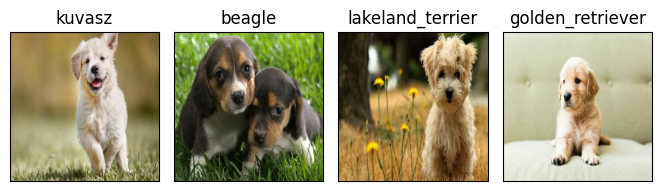

In [ ]:
# Check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(custom_images):
  plt.subplot(1, 6, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.tight_layout(h_pad=1.0)
  plt.imshow(image)